# 신경망 학습

## 4.1. 데이터에서 학습한다!

신경망은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다.

### 4.1.1. 데이터 주도 학습

기계학습은 데이터가 생명이다. 데이터에서 패턴을 발견하고 데이터로 이야기를 만들어내는 것이다.
기계학습이서 특징을 찾아내는것은 사람의 개입을 최소화하는 방향으로 진행된다.
기계학습에서 모아진 데이터로부터 규칙을 발견하는 것은 '기계'의 역할이다.

딥러닝에서는 신경망이 데이터를 있는 그대로 학습한다. 신경망은 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습한다.

### 4.1.2. 훈련 데이터와 시험 데이터

시계학습 문제는 데이터를 *훈련 데이터*와 *시험 데이터*로 나눠 학습과 시험을 수행하는 것이 일반적이다.

우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다. 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가한다.



## 4.2. 손실 함수

신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이 학습의 목표이다.

신경망 학습에서 사용하는 지표는 손실 함수(loss function)이다. 손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표이다. 이 손실 함수의 결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다.

### 4.2.1. 오차제곱합

가장 많이 쓰이는 손실 함수는 *오차제곱합*이다. 이 함수는 다음과 같이 정의된다.

$$
E = \frac{1}{2} \sum_{k} (y_k - t_k)^2
$$

여기서 $y_k$는 신경망의 출력, $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타낸다.



In [1]:
import numpy as np
def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [2]:
# 2가 정답
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(sum_squares_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


### 4.2.2. 교차 엔트로피 오차

$$
E = -\sum_{k} t_k \log y_k
$$

* $y_k$는 신경망의 출력, $t_k$는 정답 레이블, $k$는 데이터의 차원 수를 나타낸다.
* $t_k$는 정답에 해당하는 원-핫 인코딩이다.
* 식이 의미하는 것은 정답일 때의 출력이 전체 값을 정하게 된다.
* 정답이 2일 때, $y_2$가 1에 가까워질수록 오차는 0에 가까워진다.

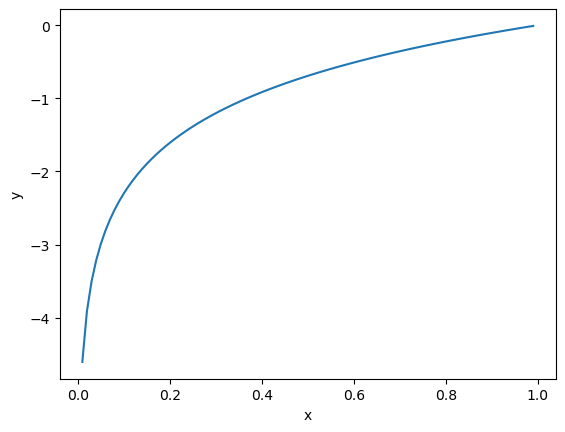

In [4]:
# 자연로그 y=logx의 그래프

import matplotlib.pyplot as plt
x = np.arange(0.01, 1, 0.01)
y = np.log(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

x가 1에 가까워질수록 -log(x)는 0에 가까워진다. 반대로 x가 0에 가까워질수록 -log(x)는 무한대로 커진다.


In [5]:
# Python에서 교차 엔트로피 오차를 구현
def cross_entropy_error(y, t):
  """교차 엔트로피 오차를 구하는 함수
  
  여기서는 y가 0이 되지 않도록 delta를 더해줍니다. 
  이는 np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없기 때문입니다.
  
  Arguments:
      y {np.array} -- 예측값
      t {np.array} -- 정답
  """
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [7]:
# 2가 정답
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 2일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 7일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3. 미니배치 학습

미니배치 학습은 데이터가 많을 때 데이터의 일부만 골라 학습을 수행하는 방법이다. 

**훈련 데이터 모두에 대한 손실 함수의 합을 구하는 식**
$$
E = -\frac{1}{N} \sum_n \sum_k t_{nk} \log y_{nk}
$$

데이터가 N개일 때, $t_{nk}$는 n번째 데이터의 k번째 값을 의미한다.

($y_{nk}는 신경망의 출력, $t_{nk}$는 정답 레이블, N은 데이터의 차원 수를 나타낸다.)

마지막에 N으로 나누어 정규화하는 것을 잊지 말아야 한다.

N으로 나눔으로써 '평균 손실 함수'를 구할 수 있다. 평균 손실 함수는 통일된 지표가 된다.

하지만 데이터가 많을 때는 모든 데이터를 대상으로 손실 함수를 계산하는 것은 현실적이지 않다. 그래서 데이터 일부를 추려 전체의 '근사치'로 이용한다. 이 일부를 미니배치라고 한다.

In [15]:
# 미니배치 학습

import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(f"훈련 데이터 크기: {x_train.shape}, 훈련 레이블 크기: {t_train.shape}")

# 무작위로 10장만 빼내기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # train_size에서 batch_size만큼 무작위로 골라낸다.
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(batch_mask)
print(x_batch.shape) # (10, 784)

훈련 데이터 크기: (60000, 784), 훈련 레이블 크기: (60000, 10)
[29973 48339 58850 49266 23156 33342 45470 15295 27428 55529]
(10, 784)


### 4.2.4. 배치용 교차 엔트로피 오차 구현하기

In [16]:
def cross_entropy_error(y, t):
  """교차 엔트로피 오차를 구하는 함수 (미니배치 버전)
  
  Info: 원-핫 원코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시한다.
  
  Arguments:
    y {np.array} -- 신경망의 출력
    t {np.array} -- 정답 레이블
    
  Returns:
    float -- 교차 엔트로피 오차
  """
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

### 4.2.5. 왜 손실 함수를 설정하는가?

**정확도를 지표로 삼아서는 안되는 이유**

신경망 학습에서 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다. 이때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.

## 4.3. 수치 미분

경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정한다.


### 4.3.1. 미분

미분은 한순간의 변화량을 표시한 것이다. 수식으로는 다음과 같이 정의된다.
$$
\frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

좌변은 $f(x)$의 x에 대한 미분을 나타낸다. 미분은 x의 작은 변화가 함수 f(x)를 얼마나 변화시키느냐를 의미한다.

시간의 작은 변화, 시간을 뜻하는 h를 한없이 0에 가깝게 한다는 것을$\lim_{h \to 0}$로 표시한다.

In [1]:
# 파이썬으로 미분 계산하기 - 나쁜 예

def numerical_diff(f, x):
  h = 1e-50 # 1e-50은 너무 작아 반올림 오차가 발생한다.
  return (f(x+h) - f(x)) / h # f(x+h)와 f(x)의 차분 계산에 문제가 있다.

In [2]:

# 개선된 수치 미분 함수
def numerical_diff(f, x):
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2. 수치 미분의 예

$$
y=0.01x^2 + 0.1x
$$

In [3]:
def func_1(x):
  return 0.01*x**2 + 0.1*x # y = 0.01x^2 + 0.1x

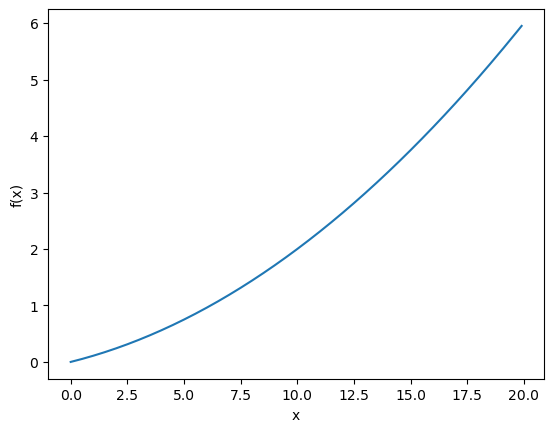

In [4]:
# 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = func_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [5]:
# x=5, x=10일 때 미분 계산하기
print(numerical_diff(func_1, 5))
print(numerical_diff(func_1, 10))

0.1999999999990898
0.2999999999986347


이렇게 계산한 미분값이 x에 대한$f(x)$의 변화량이다.(기울기)

$f(x) = 0.01x^2 + 0.1x$의 해석적 해는 $\frac{df(x)}{dx} = 0.02x + 0.1$이다.

x=5일 때와 x=10일 때의 미분값은 각각 0.2와 0.3으로 수치 미분의 결과와 거의 같다.

In [8]:
# x=5, x=10일 때의 접선 그리기

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.

# for i in [5, 10]:
#   y = func_1(x)
#   plt.xlabel("x")
#   plt.ylabel("f(x)")

#   # 접선의 기울기
#   grad = numerical_diff(func_1, i)
#   y = func_1(i) + grad * (x - i)
#   plt.plot(x, y)
#   plt.show()

### 4.3.3. 편미분

편미분은 변수가 여럿인 함수에 대한 미분이다. 변수가 여럿인 함수에 대한 미분을 편미분이라고 한다.
$$
f(x_0, x_1) = x_0^2 + x_1^2
$$

In [9]:
def func_2(x):
  """y = 0.01x^2 + 0.1x
  
  Arguments:
    x {float} -- x값
    
  Returns:
    float -- y값
  """
  return x[0]**2 + x[1]**2


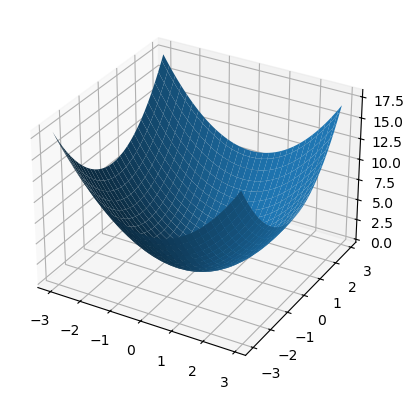

In [10]:
# render 3D plot of func_2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
x, y = np.meshgrid(x, y)
z = func_2([x, y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
plt.show()

이 함수를 그래프로 그리면 3차원 곡면이 된다. 이 함수를 $x_0$에 대해 편미분한 결과는 $2x_0$이다. $x_1$에 대해 편미분한 결과는 $2x_1$이다.

func_2(x)는 $x_0$와 $x_1$의 편미분을 동시에 계산한다. 편미분의 수식은$\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$로 표기한다.

In [12]:
# 문제 1 - x0=3, x1=4일 때 (x0, x1)에서의 편미분을 구하라
def func_tmp1(x0):
  return x0*x0 + 4.0**2.0

print(numerical_diff(func_tmp1, 3.0))

# 문제 2 - x0=3, x1=4일 때 (x0, x1)에서의 편미분을 구하라
def func_tmp2(x1):
  return 3.0**2.0 + x1*x1

print(numerical_diff(func_tmp2, 4.0))

6.00000000000378
7.999999999999119


## 4.4. 기울기

편미분 $x_0$와 $x_1$의 편미분을 동시에 계산하고 싶을 때$(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$ 모든 변수의 편미분을 벡터로 정리한 것을 기울기(gradient)라고 한다.

In [13]:
def numerical_gradient(f, x):
  """수치 미분으로 기울기를 계산하는 함수
  
  Arguments:
    f {function} -- 기울기를 계산할 함수
    x {np.array} -- 기울기를 계산할 위치
  """
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # x와 형상이 같고 그 원소가 모두 0인 배열을 생성

  for idx in range(x.size):
    tmp_val = x[idx]
    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원

  return grad

In [17]:
print(numerical_gradient(func_2, np.array([3.0, 4.0])))
print(numerical_gradient(func_2, np.array([0.0, 2.0])))
print(numerical_gradient(func_2, np.array([3.0, 0.0])))
print(numerical_gradient(func_2, np.array([3.0, 5.0])))
print(numerical_gradient(func_2, np.array([9.0, 11.0])))

[6. 8.]
[0. 4.]
[6. 0.]
[ 6. 10.]
[18. 22.]


$f(x_0, x_1) = x_0^2 + x_1^2$의 기울기를 그림으로 표현

### 4.4.1. 경사법(경사 하강법)

